## Function definitions

In [11]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['legend.frameon'] = False

def plottestingParams(scoreListTestPoints, scoreList, scores_std,
                      C_s,paramName = ""):
    # plotting the graph mean score (cv = 4) with the standard deviation
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.plot(C_s, scoreList, label = "Cv training score", color = "red")
    plt.plot(C_s, scoreListTestPoints, label = "Test score", color = "blue")
    plt.fill_between(C_s, np.array(scoreList) - np.array(scores_std),
                            np.array(scoreList) + np.array(scores_std),
                                                color='gray', alpha=0.2)
    plt.ylabel('CV score')
    plt.legend(loc='upper right', shadow=True)
    plt.xlabel('Parameter %s' % paramName)
    annot_max(C_s,scoreListTestPoints)
    ylim2 = max(scoreList) + max(scores_std)
    ylim2 = ylim2 + ylim2 * 0.01
    ylim1 = min(scoreList) + min(scores_std)
    ylim1 = ylim1 - ylim1*0.01
    plt.ylim(ylim1,ylim2)
    plt.show()

def annot_max(x,y, ax=None):
    """
        writes x and y values for max(y) on the plot
        args :
        _______________________
        x = list of values (floats/ints)
        y = list of values (floats/ints)
    """
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.5,0.96),fontsize=10, **kw)

def plotting(testpoints, testclasses, clf, h = 0.2, title = ""):
    """
        plots the prediction graph

        args :
        ______________________
        testpoints : testing data (tested on 2d array)
        clf : a fitted model (tested on neighbors.KNeighborsClassifier)
        h = 0.2 by default 
        title = "" vy default

        return :
        ______________________
            void()
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = testpoints[:, 0].min() - 1, testpoints[:, 0].max() + 1
    y_min, y_max = testpoints[:, 1].min() - 1, testpoints[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    # n_neighbors = 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #
    # Create color maps
    cmap_light = ListedColormap(['red','blue','green','orange','cyan'])
    cmap_bold = ListedColormap(['red','blue','green','orange','cyan'])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    #
    # Plot also the training points
    plt.scatter(testpoints[:, 0], testpoints[:, 1], c=testclasses,
        cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

## css style definition for this notebook

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;a
    vertical-align: middle;
}
body {
  counter-reset: h1; 
}
h1:before {
    counter-increment: h1;
    content: counter(h1) ". "
}
</style>
""")


## Loading the dataset

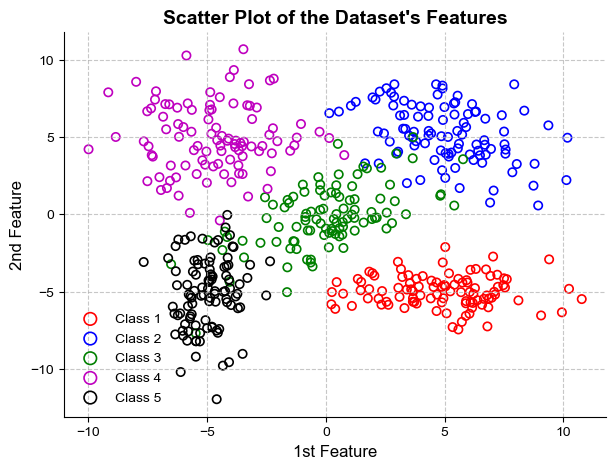

In [4]:
data_app = np.loadtxt("data/data_tp1_app.txt",delimiter=' ')

data_test = np.loadtxt("data/data_tp1_dec.txt",delimiter=' ')

# The training set 
X = data_app[:,1:]
y = data_app[:,0]

# The testing set 
testPoints = data_test[:,1:]
testClasses = data_test[:,0]

col = ["r", "b", "g", "m", "k"]

plt.figure(figsize=(7, 5))

for i in range(1, 6):
    idx = np.where(data_app[:, 0] == i)
    plt.scatter(
        data_app[idx, 1],
        data_app[idx, 2],
        edgecolors=col[i - 1],
        facecolors="none",
        label="%s %d" % ("Class", i),
        linewidths=1.2,
    )

plt.title("Scatter Plot of the Dataset's Features", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, markerscale=1.5)
plt.xlabel("1st Feature", fontsize=12)
plt.ylabel("2nd Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# k-nearest neighbors
K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for both classification and regression tasks.

**Key features of KNN:**

1. Instance-Based Learning: KNN is an instance-based or lazy learning algorithm. Instead of explicitly learning a model from the training data, KNN makes predictions based on the similarity of new instances to previously seen instances.

2. Proximity Metric: KNN uses a proximity metric (usually Euclidean distance) to measure the similarity between data points in a feature space. The "k" nearest neighbors of a given data point are those with the shortest distances.

3. Classification: For classification tasks, KNN assigns the majority class among its k-nearest neighbors to the new data point. The predicted class is the one with the most occurrences among the neighbors.

4. Regression: In regression tasks, KNN predicts the output value for the new data point by taking the average (or weighted average) of the output values of its k-nearest neighbors.

5. Hyperparameter "k": The choice of the parameter "k" (number of neighbors) is crucial. A smaller "k" can lead to noisy predictions, while a larger "k" can oversmooth the decision boundaries.

6. No Model Training: KNN does not involve explicit model training. It simply stores the training instances and performs computations during prediction time.

7. Non-Parametric: KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution.

8. Sensitive to Data Density: KNN's performance can be affected by data density, as it heavily relies on the distribution of data points in the feature space.

KNN is easy to understand and implement, making it a popular choice for baseline models and quick prototyping. However, it might not perform well on high-dimensional data or when dealing with imbalanced datasets. Careful tuning of the "k" parameter and data preprocessing can impact its effectiveness.

## k-nearest neighbors with k = 1

In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, weights="distance")
scores = cross_val_score(clf, X, y, cv=4)
print("The mean score of the 1 Nearest Neighbor Classifier prediction (cv = 4) on training data is %.3f"\
                                                            % scores.mean())
# The mean score of the 1 Nearest Neighbor Classifier prediction (cv = 4) on training data 0.920
clf.fit(X,y)
predictedClasses = clf.predict(testPoints)
print ("The score of the 1 Nearest Neighbor classifier prefiction on test data is %.3f"\
                                % clf.score(testPoints,testClasses))
# The score of the 1 Nearest Neighbor classifier prefiction on test data is 0.920

The mean score of the 1 Nearest Neighbor Classifier prediction (cv = 4) on training data is 0.920
The score of the 1 Nearest Neighbor classifier prefiction on test data is 0.920


## Visualization of the knn classifier with k = 1

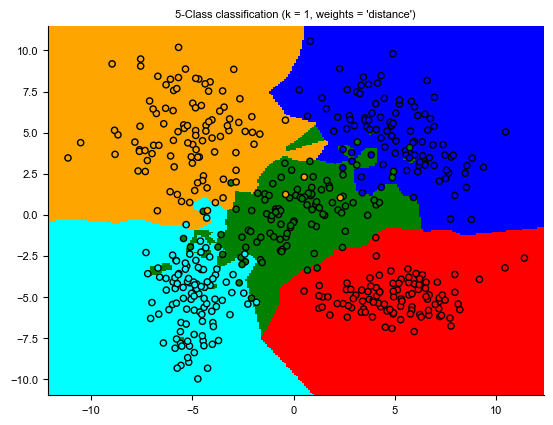

The score of the 1 Nearest Neighbor classifier prefiction on test data is 0.920


In [9]:
n_neighbors = 1

clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X,y)
title = "5-Class classification (k = %i, weights = '%s')"\
                                                % (n_neighbors, "distance")
plotting(testPoints,testClasses, clf, h = 0.1, title = title)
print("The score of the 1 Nearest Neighbor classifier prefiction on test data is %.3f" %\
                           clf.score(testPoints,testClasses))

## Adjusting parameters with grid-search: the k parameter (number of neighbors)

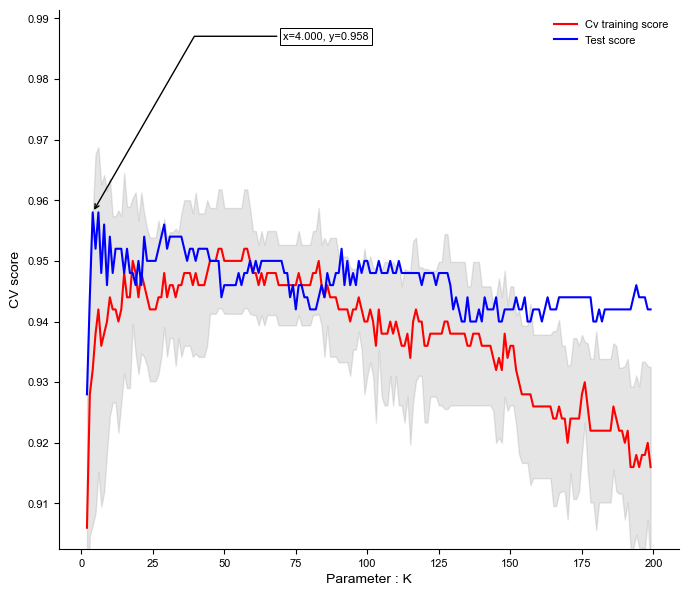

In [10]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for n_neighbors in range(2,200):
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm = 'brute')
    scores = cross_val_score(clf, X, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(n_neighbors)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

plt.figure(figsize=(8, 7))
plt.title("Hyperparameters adjustement : parameter K evaluation")
plottestingParams(scores_test, scores_training, scores_std, params, paramName = ": K")

**Interpretation :** the best score (0.958) is achieved on the test set when k = 4.

## Visualization of the knn classifier with  k = 4

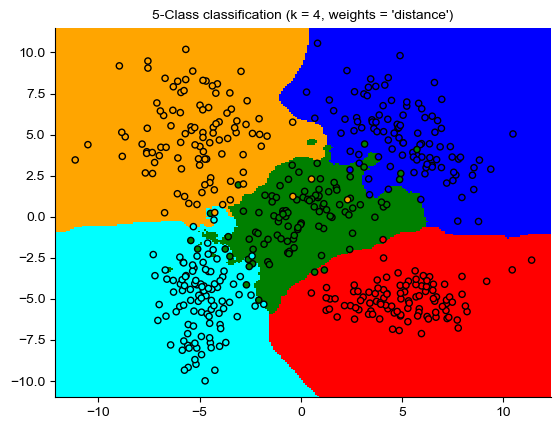

In [25]:
n_neighbors = params[np.argmax(scores_test)]
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X,y)
title = "5-Class classification (k = %i, weights = '%s')"\
                                                % (n_neighbors, "distance")
plotting(testPoints,testClasses, clf, h = 0.1, title = title)

It is noticeable that the boundaries are improved with 4 nearest neighbors compared to a single nearest neighbor.

# Linear SVC
Linear Support Vector Classifier (Linear SVC) is a popular machine learning algorithm used for binary and multiclass classification tasks.

**Key features of Linear SVC:**

1. Linear Classification: Linear SVC is designed to separate data points from different classes using linear decision boundaries.

2. Support Vector Machine (SVM): Linear SVC is a variant of the Support Vector Machine algorithm, specifically optimized for linearly separable or nearly separable data.

3. Margin Maximization: Linear SVC aims to find the hyperplane that maximizes the margin (distance) between the classes, promoting better generalization to unseen data.

4. Soft Margin: In cases where the data is not perfectly separable, Linear SVC allows for a soft margin, which permits a certain amount of misclassification to achieve better overall classification performance.

5. Regularization: Linear SVC employs regularization techniques to control the complexity of the model and prevent overfitting.

6. Kernel Trick: While Linear SVC itself operates in the original feature space, SVMs can be extended to use the kernel trick to handle nonlinear decision boundaries by mapping data into a higher-dimensional space.

7. Large Margin Classifier: Linear SVC focuses on finding the hyperplane that best separates the classes while maintaining a maximum margin between them.

8. Efficient Training: Linear SVC is efficient and scales well to large datasets, especially in scenarios where the number of features is much larger than the number of samples.

Linear SVC is suitable for situations where the data can be separated by a linear boundary and provides a strong foundation for understanding the principles of SVMs. It is widely used in various fields, including text classification, image recognition, and bioinformatics. However, it might not perform well on complex, nonlinear data distributions without the use of kernels.

score of LinearSVC is 0.946
score of LinearSVC on test data is 0.934


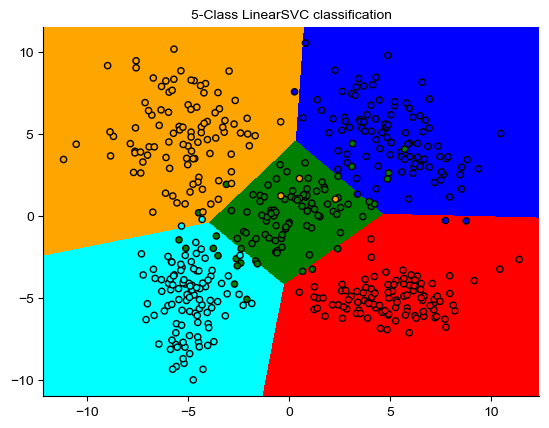

In [28]:
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=4)
print("score of LinearSVC is %0.3f" % scores.mean())
# score of LinearSVC with solver = lbfgs is 0.946

print("score of LinearSVC on test data is %0.3f"\
                                    % clf.score(testPoints, testClasses))
# score of LinearSVC on test data is 0.934

title = "5-Class LinearSVC classification"
plotting(testPoints, testClasses, clf, h=0.01, title = title)

**Interpretation**: without any hyperparameter tuning, the obtained score is 0.934 which is not bad at all.


# Multilayer Perceptron (MLP):

A Multilayer Perceptron (MLP) is a type of artificial neural network designed for supervised learning tasks, particularly in the field of machine learning and deep learning. It consists of multiple layers of interconnected artificial neurons (also called nodes or units) organized in a sequential manner.

**Key Features:**
1. Input Layer: This is the first layer that receives the raw input data, such as images, text, or numerical values. Each neuron in this layer corresponds to a feature in the input data.

2. Hidden Layers: These are intermediate layers between the input and output layers. Each neuron in a hidden layer receives input from all neurons in the previous layer and produces an output that is passed to the next layer. Hidden layers are responsible for learning complex patterns and representations from the data.

3. Output Layer: This final layer produces the network's prediction or output. The number of neurons in this layer corresponds to the number of classes in a classification problem or the dimensions of the target variable in a regression problem.

4. Activation Functions: Neurons in the hidden layers and sometimes in the output layer use activation functions to introduce non-linearity into the model. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.

5. Weights and Biases: Each connection between neurons has an associated weight, which determines the strength of the connection. Additionally, each neuron has a bias term that shifts the weighted sum of inputs before passing through the activation function.

**Learning Process:**
1. Feedforward Propagation: During training and prediction, data flows through the network in a process called feedforward propagation. Each neuron computes a weighted sum of its inputs, adds a bias term, and passes the result through an activation function to produce an output.

2. Backpropagation: MLPs use a training algorithm called backpropagation to update the weights and biases based on the difference between the predicted output and the actual target. This process iteratively adjusts the parameters to minimize the prediction error.

**Applications:**
MLPs are versatile and capable of learning complex relationships in data, making them suitable for various tasks such as image recognition, natural language processing, and regression analysis. However, they may require careful tuning of hyperparameters and can be prone to overfitting if not properly regularized.


score of mlp with solver = lbfgs is 0.926
score of mlp with solver = lbfgs on test data is 0.914


<Figure size 800x800 with 0 Axes>

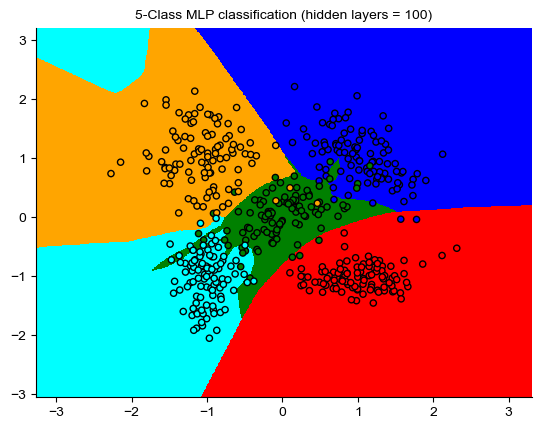

In [34]:
scaler = StandardScaler()
scaler.fit(X)
XScaled = scaler.transform(X)

scaler = StandardScaler()
scaler.fit(testPoints)
testpointsScaled = scaler.transform(testPoints)

clf = MLPClassifier(solver='lbfgs', random_state = 2, max_iter=10000)
# MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#     beta_2=0.999, early_stopping=False, epsilon=1e-08,
#     hidden_layer_sizes=(100,), learning_rate='constant',
#     learning_rate_init=0.001, max_iter=200, momentum=0.9,
#     nesterovs_momentum=True, power_t=0.5, random_state=None,
#     shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
#     verbose=False, warm_start=False)

scores = cross_val_score(clf, XScaled, y, cv=4)
print("score of mlp with solver = lbfgs is %0.3f" % scores.mean())
# score of mlp with solver = lbfgs is 0.93

clf.fit(XScaled, y)
print("score of mlp with solver = lbfgs on test data is %0.3f"\
                                    % clf.score(testpointsScaled, testClasses))

title = "5-Class MLP classification (hidden layers = 100)"
plt.figure(figsize=(8,8))
plotting(testpointsScaled, testClasses, clf, h=0.01, title = title)

## Interpretation of the results with a single hidden layer
The multilayer perceptron classifier is sensitive to feature scaling, so it is highly recommended to scale the data.

The prediction graph demonstrates an effective separation of points; however, predicting on a larger dataset might lead to issues due to the green region between x = -1 and x = 0.

This training yields a score of 0.914 on the test set.

## Adjusting the number of hidden layers

In [41]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for numFeatures in range(1, 100):
    clf = MLPClassifier(solver='lbfgs', random_state = 2, hidden_layer_sizes=(numFeatures,), max_iter=10000)
    scores = cross_val_score(clf, XScaled, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(numFeatures)
    clf.fit(XScaled,y)
    scores_test.append(clf.score(testpointsScaled, testClasses))    

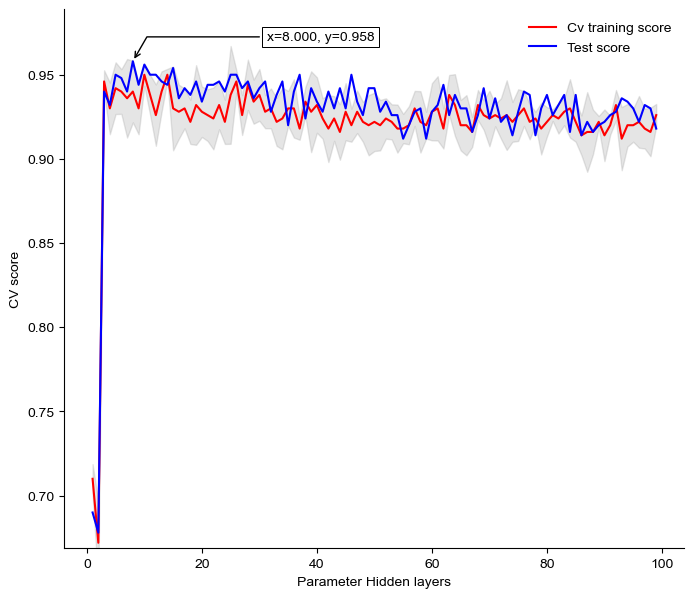

Best score : 0.958 with 8 hidden units


In [43]:
plt.figure(figsize=(8, 7))
plottestingParams(scores_test, scores_training, scores_std, params, paramName = "Hidden layers")

print ("Best score : %.3f with %d hidden units" % (max(scores_test), np.argmax(scores_test) + 1))

## Prediction graph on test data using an MLP with 8 hidden layers.

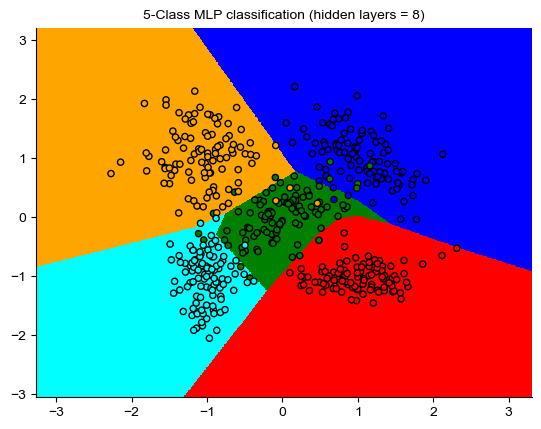

In [45]:
hiddenLayers = params[np.argmax(scores_test)]

clf = MLPClassifier(solver='lbfgs', random_state = 2, hidden_layer_sizes = (hiddenLayers,), max_iter=10000)
clf.fit(XScaled, y)

title = "5-Class MLP classification (hidden layers = %d)" % hiddenLayers
plotting(testpointsScaled, testClasses, clf, h=0.01, title = title)

# Random Forest
Random Forest is an ensemble machine learning algorithm that combines the predictions of multiple individual decision trees to produce a more accurate and robust result. It belongs to the family of bagging algorithms, which aim to reduce overfitting and improve generalization.

**Key features of Random Forest:**

1. Ensemble Approach: Random Forest creates a "forest" of decision trees, each trained on a random subset of the training data. The final prediction is obtained by aggregating the predictions of these individual trees.

2. Random Subset Selection: During training, each tree is built using a random subset of the original data with replacement (bootstrap samples). This introduces diversity and reduces the risk of overfitting.

3. Feature Randomness: When splitting nodes in the decision trees, Random Forest considers only a subset of the features. This adds an additional layer of randomness and helps prevent dominance by a single feature.

4. Voting or Averaging: For classification tasks, the mode (most frequent) prediction among the trees is taken as the final prediction. For regression tasks, the average prediction is used.

5. Highly Parallelizable: Random Forest training and prediction can be efficiently parallelized, making it suitable for large datasets and distributed computing environments.

6. Robustness: Random Forest is less sensitive to noisy data and outliers compared to individual decision trees.

7. Bias-Variance Trade-off: By combining multiple trees, Random Forest strikes a balance between bias and variance, leading to better generalization and more accurate predictions.

Random Forest is widely used for classification, regression, and feature selection tasks. It has become a popular choice due to its simplicity, effectiveness, and ability to handle a variety of data types and complexities. However, it might not perform as well as specialized algorithms in certain scenarios, such as in cases where data has strong sequential or temporal dependencies.


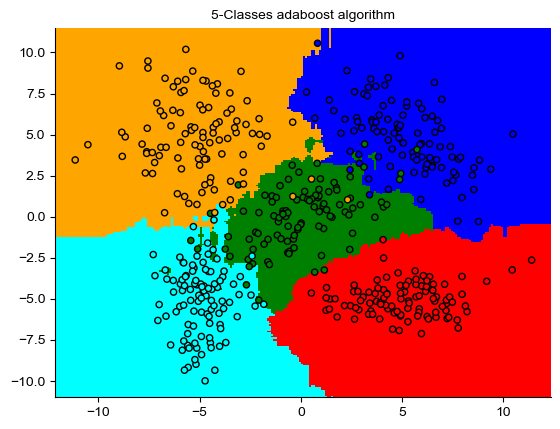

score of the ExtraTreesClassifier is 0.928
score of the ExtraTreesClassifier on test data is 0.942


In [46]:
clf = clf = ExtraTreesClassifier(random_state=2)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=4)

title = "5-Classes adaboost algorithm"
plotting(testPoints, testClasses, clf, h=0.1, title = title)


print("score of the ExtraTreesClassifier is %0.3f" % scores.mean())

print("score of the ExtraTreesClassifier on test data is %0.3f"\
                                    % clf.score(testPoints, testClasses))

## Adjustment of the number of binary trees used

In [51]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for estimators in range(1,100):
    clf = ExtraTreesClassifier(n_estimators=estimators, random_state=2)
    scores = cross_val_score(clf, X, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(estimators)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

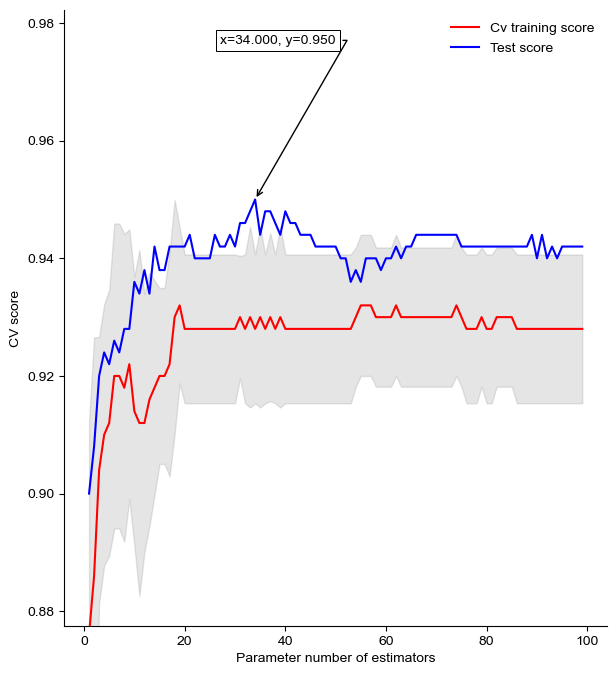

In [52]:
plt.figure(figsize=(7,8))
plottestingParams(scores_test, scores_training, scores_std, params,paramName = "number of estimators")

**interpretation:** using 34 binary trees yields a prediction score of 0.950 on the training data with a 4-fold cross-validation.

## Adjustment of the maximum tree depth

In [54]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for depth in range(1,200):
    clf = ExtraTreesClassifier(random_state=2, n_estimators=34, max_depth=depth)
    scores = cross_val_score(clf, X, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(depth)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

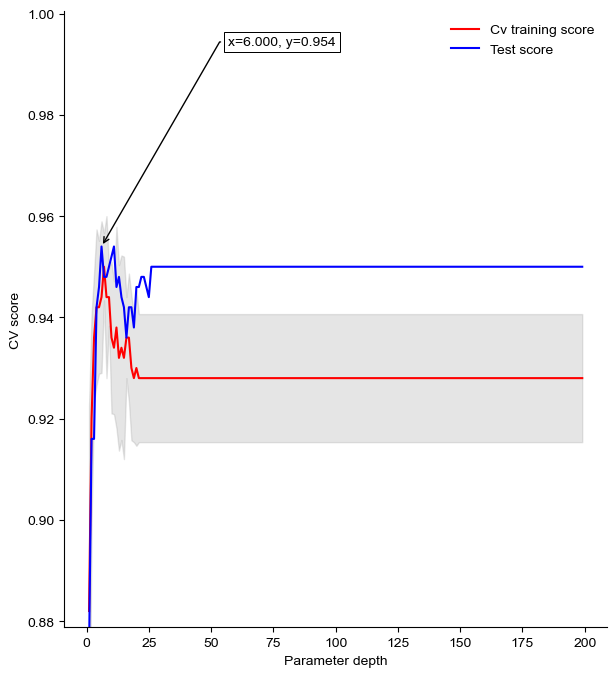

In [55]:
plt.figure(figsize=(7,8))
plottestingParams(scores_test, scores_training, scores_std, params, paramName = "depth")

**Interpretation :** a maximum depth of 6 increases the prediction score on the training data to 0.954 with a 4-fold cross-validation.

## Adjustment of the minimum number of leaves

In [56]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for min_leaf in range(1,200):
    clf = ExtraTreesClassifier(random_state=2, n_estimators=34, max_depth=6, min_samples_leaf=min_leaf)
    scores = cross_val_score(clf, X, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(min_leaf)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

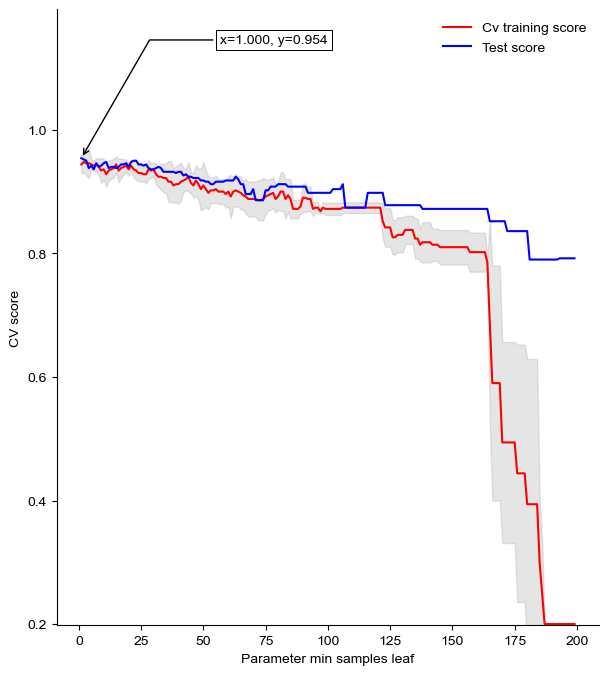

In [57]:
plt.figure(figsize=(7,8))
plottestingParams(scores_test, scores_training, scores_std, params, paramName = "min samples leaf")

**Interpretation :** the optimal minimum number of leaves is 1 with a score of 0.954 on the test set.

# C4.5

C4.5 is a classic and influential machine learning algorithm used for building decision trees, primarily for classification tasks.

**Key features of C4.5:**

1. Decision Tree Construction: C4.5 constructs a decision tree by recursively partitioning the feature space based on the information gain (or other criteria) at each node.

2. Top-Down Approach: It employs a top-down, divide-and-conquer strategy to create the tree, starting with the entire dataset and refining the splits in subsequent levels.

3. Attribute Selection: C4.5 uses the concept of information gain to select the best feature to split on at each node. It aims to maximize the reduction in uncertainty or entropy.

4. Handling Numerical Data: C4.5 handles both categorical and numerical attributes through discretization, where numerical values are converted into categorical ranges.

5. Pruning: After constructing the tree, C4.5 prunes branches that do not significantly improve classification accuracy on validation data, preventing overfitting.

6. Missing Values: C4.5 can handle missing attribute values by appropriately distributing instances based on available information.

7. Multi-Class Classification: C4.5 can handle multi-class classification problems by using a one-vs-all approach or considering all classes together.

8. Compact Rules: C4.5 can transform the decision tree into a set of rules for human interpretability and practical use.

C4.5's successor, C5.0 (also known as C5), introduced additional improvements and optimizations. C4.5 has been foundational in the field of machine learning and decision tree algorithms, providing a basis for various modern algorithms and techniques.

score of the C4.5 classifier with cross-val = 4 is 0.904
score of the C4.5 prediction on test data is 0.906


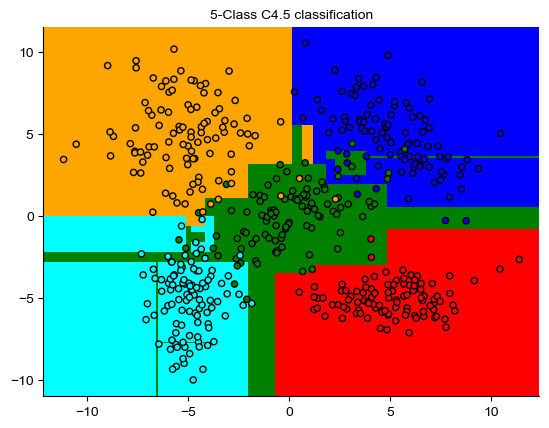

In [63]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=4)

print("score of the C4.5 classifier with cross-val = 4 is %0.3f" % scores.mean())

print("score of the C4.5 prediction on test data is %0.3f"\
                                    % clf.score(testPoints, testClasses))

title = "5-Class C4.5 classification"
plotting(testPoints, testClasses, clf, h=0.01, title = title)

## Adjustment of the depth parameter

In [64]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for depth in range(1,200):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(clf, X, y, cv=4, scoring='accuracy')
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(depth)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

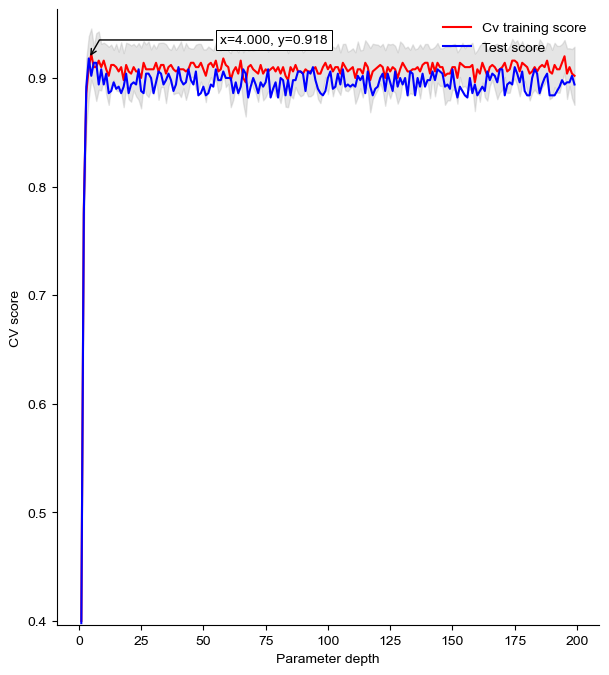

In [65]:
plt.figure(figsize=(7,8))
plottestingParams(scores_test, scores_training, scores_std, params,paramName = "depth")

**Interpretation :**The optimal maximum depth is 4, which yields a score of 0.918 on the test set as shown in the figure above.

# Ensemble Methods (AdaBoost and Bagging)
Ensemble methods, such as AdaBoost and Bagging, are powerful techniques in machine learning that involve combining multiple individual models to create a more robust and accurate prediction.

**AdaBoost (Adaptive Boosting):** AdaBoost focuses on sequentially training weak learners (usually simple models) and giving more weight to misclassified instances in each iteration. It creates a strong classifier by combining these weak learners, with each contributing more weight to areas where the previous models struggled. The final prediction is based on a weighted majority vote of the individual models.

**Bagging (Bootstrap Aggregating):** Bagging involves training multiple instances of the same model on different subsets of the training data, obtained by random sampling with replacement. The predictions of these models are then aggregated through averaging (for regression) or majority voting (for classification). Bagging helps reduce overfitting and improves model stability.

Ensemble methods like AdaBoost and Bagging exploit the diversity of individual models to enhance generalization and prediction performance. They are widely used for a variety of machine learning tasks and can significantly improve model accuracy and robustness, making them essential tools in the data scientist's toolbox.

## AdaBoost with a Decision Tree Classifier

The mean score of adaboost prediction (cv = 4, 100 estimator) on training data is 0.862
The score of adaboost prediction on test data is 0.916


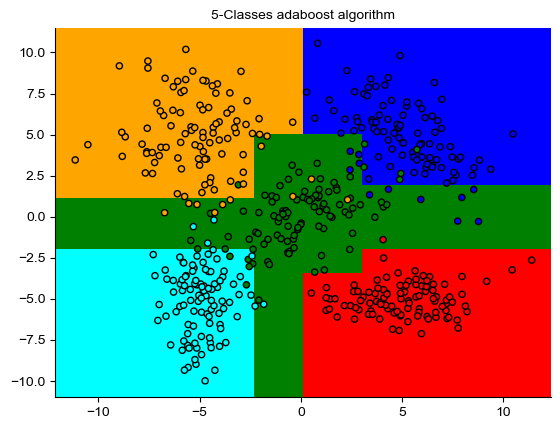

In [66]:
clf = AdaBoostClassifier(n_estimators=100,
                        algorithm = "SAMME")
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=4)

print("The mean score of adaboost prediction (cv = 4, 100 estimator) on training data is %.3f" % scores.mean())

print("The score of adaboost prediction on test data is %0.3f"\
                                    % clf.score(testPoints, testClasses))

title = "5-Classes adaboost algorithm"
plotting(testPoints, testClasses, clf, h=0.1, title = title)

## Adjustment of the learning rate parameter

In [67]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for learn_rate in np.arange(0.05, 1, 0.05):
    clf = AdaBoostClassifier(n_estimators=100, algorithm = "SAMME", learning_rate = learn_rate)
    scores = cross_val_score(clf, X, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(learn_rate)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

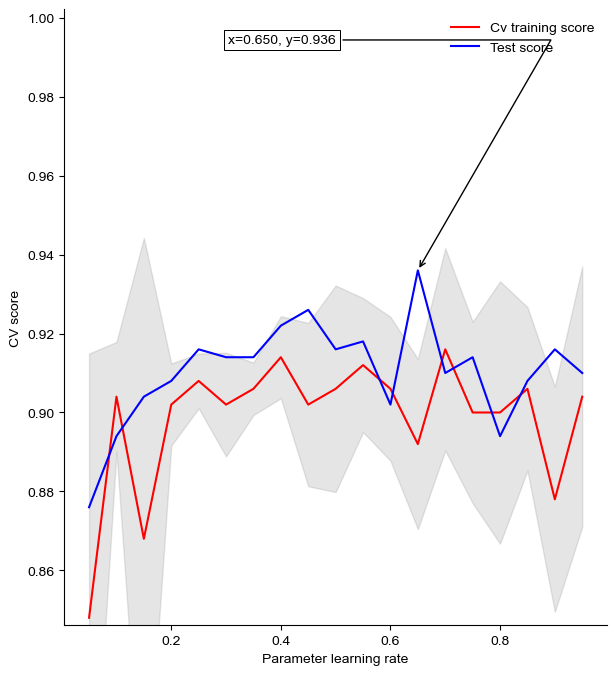

In [68]:
plt.figure(figsize=(7,8))
plottestingParams(scores_test, scores_training, scores_std, params,paramName = "learning rate")

**Interpretation**: a learning rate of 0.65 provides the best training score of 0.936 on the test set.

## Adjustment of the number of classifiers parameter

In [69]:
scores_std = [] # training std score with cv = 4
scores_training = [] # training mean score with cv = 4
params = [] # param list
scores_test = [] # testing scores
for n_learners in range(1,200):
    clf = AdaBoostClassifier(n_estimators=n_learners, algorithm = "SAMME", learning_rate = 0.65)
    scores = cross_val_score(clf, X, y, cv=4)
    scores_std.append(np.std(scores))
    scores_training.append(np.mean(scores))
    params.append(n_learners)
    clf.fit(X,y)
    scores_test.append(clf.score(testPoints, testClasses))

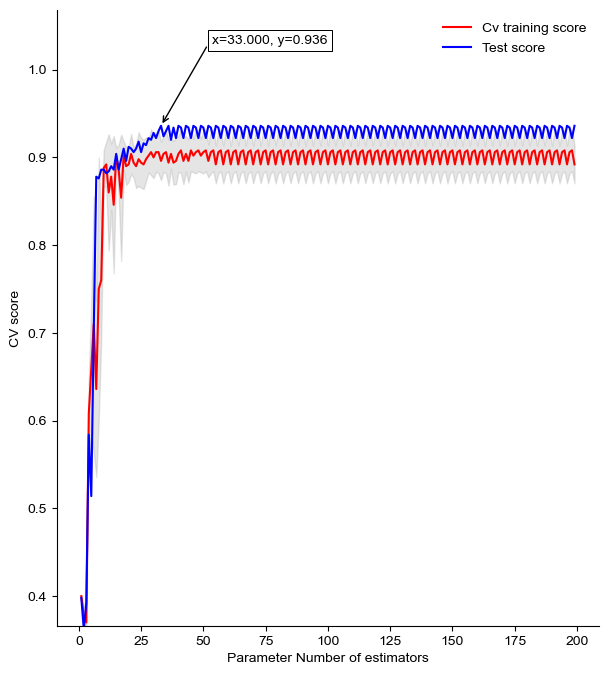

In [71]:
plt.figure(figsize=(7,8))
plottestingParams(scores_test, scores_training, scores_std, params,paramName = "Number of estimators")

**Interpretation :** the above graph shows that the best score (0.936) is achieved with 33 classifiers.

## Bagging

## Bagging with a KNN classifier

In [72]:
bagging = BaggingClassifier(neighbors.KNeighborsClassifier(), n_estimators = 100)
bagging.fit(X,y)
print ("Score of bagging with KNN using 100 estimators on test data = %.3f"\
                                % bagging.score(testPoints,testClasses))
print("Score of a single KNN classifier prediction on test data = %.3f" %\
      neighbors.KNeighborsClassifier().fit(X,y).score(testPoints,testClasses))

Score of bagging with KNN using 100 estimators on test data = 0.954
Score of a single KNN classifier prediction on test data = 0.952


## Bagging with an SVC

In [81]:
bagging = BaggingClassifier(LinearSVC(max_iter=100000), n_estimators = 100)

bagging.fit(X,y)
print ("Score of bagging with SVM using 100 estimators on test data = %.3f"\
                                % bagging.score(testPoints,testClasses))
print("Score of a single SVM classifier prediction on test data = %.3f" %\
      LinearSVC().fit(X,y).score(testPoints,testClasses))

Score of bagging with SVM using 100 estimators on test data = 0.940
Score of a single SVM classifier prediction on test data = 0.934


C:\Users\gbadr\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Bagging with an MLP classifier

In [86]:
scaler = StandardScaler()
scaler.fit(X)
XScaled = scaler.transform(X)

scaler = StandardScaler()
scaler.fit(testPoints)
testpointsScaled = scaler.transform(testPoints)

bagging = BaggingClassifier(MLPClassifier(max_iter=10000, hidden_layer_sizes=(8,)), n_estimators = 33)
bagging.fit(XScaled,y)
print ("Score of bagging with MLP using 33 estimators on test data = %.3f"\
       % bagging.score(testpointsScaled, testClasses))

Score of bagging with MLP using 33 estimators on test data = 0.954


**Interprétation  :** with this dataset Bagging shows to be more effective with MLP with a slight increase in the prediction score. However, this improvement is absent with the other two KNN and SVM classifiers.

| Model                        | Hyperparameters                           | Test Prediction Score |
|------------------------------|-------------------------------------------|-----------------------|
| KNN                          | k = 1                                    | 0.92                  |
| KNN                          | k = 48                                   | 0.958                 |
| LinearSVC                    |                                           | 0.934                 |
| MLP                          | 1 hidden layer                           | 0.914                 |
| MLP                          | 8 hidden layers                          | 0.958                 |
| Random forest                |                                           | 0.942                 |
| Random forest                | 34 binary trees                                    | 0.95                  |
| Random Forest               | 34 binary trees, max depth = 6                    | 0.954                 |
| C4.5                         |                                           | 0.906                 |
| C4.5                         | max depth = 4                            | 0.918                 |
| Adaboost                     | 100 decision trees                       | 0.916                 |
| Adaboost                     | LR = 0.65                                | 0.936                 |
| Adaboost                     | LR = 0.65 & 33 decision trees            | 0.936                 |
| Bagging                      | KNN                                       | 0.952                 |
| Bagging                      | SVC                                       | 0.94                  |
| Bagging                      | MLP                                       | 0.954                 |

KNN and MLP with 8 hidden layers performed the best. However the MLP tuning took considerably more time than KNN.